<a href="https://colab.research.google.com/github/hsabaghpour/Searching-Indexing-Algorithm/blob/main/Building_an_Image_Classifier_Using_the_Sequential_APIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Using Keras to load the dataset

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
#For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [7]:
#With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [8]:
class_names[y_train[0]]


'Ankle boot'

Creating the model using the sequential API


In [9]:
#Now let’s build the neural network! Here is a classification MLP with two hidden layers:

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


The code sets the random seed for TensorFlow and defines a feedforward neural network model using the Keras Sequential API with an input layer (28x28), a flatten layer, and two dense layers with ReLU activation functions, followed by an output layer with softmax activation for multiclass classification.


In [ ]:
# Simplified version of above code
"""
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
"""



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name


'dense'

In [16]:
model.get_layer('dense') is hidden1


True

In [17]:
weights, biases = hidden1.get_weights()
weights


array([[-0.04454736, -0.01947237, -0.0442072 , ...,  0.04814859,
        -0.05702312,  0.07048927],
       [-0.01763476, -0.02072078, -0.01736486, ...,  0.04727752,
        -0.07216632,  0.07162979],
       [-0.06642126,  0.02251531, -0.03763724, ..., -0.03823994,
        -0.00206369,  0.04888815],
       ...,
       [ 0.05328277, -0.04178808,  0.03204572, ...,  0.02063376,
         0.07346779, -0.06772433],
       [-0.06612587,  0.05696163,  0.0583993 , ...,  0.06591597,
        -0.02526422, -0.01151064],
       [-0.04644927,  0.04536678,  0.02248168, ..., -0.05663675,
         0.07373953,  0.03687838]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
#Compiling the model

#After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Loss function: "sparse_categorical_crossentropy" for measuring how well the model performs in multiclass classification.
Optimizer: "sgd" (Stochastic Gradient Descent) as the training algorithm.
Metrics: It tracks the accuracy of the model's predictions during training.





In [22]:
#Training and evaluating the model

history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7156 - accuracy: 0.7642 - val_loss: 0.5046 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4867 - accuracy: 0.8305 - val_loss: 0.4678 - val_accuracy: 0.8302
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4404 - accuracy: 0.8454 - val_loss: 0.4221 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4157 - accuracy: 0.8546 - val_loss: 0.3962 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3953 - accuracy: 0.8614 - val_loss: 0.3974 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3795 - accuracy: 0.8664 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3665 - accuracy: 0.8702 - val_loss: 0.3744 - val_accuracy:

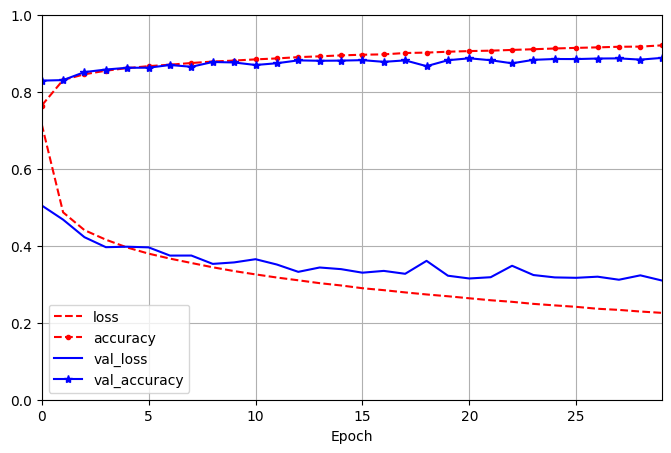

In [23]:


import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [24]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8840


[0.3254082500934601, 0.8840000033378601]

In [25]:
#Using the model to make predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
#If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance:


import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
#Here, the classifier actually classified all three images correctly

y_new = y_test[:3]
y_new




array([9, 2, 1], dtype=uint8)